- File name: Punto2_Tarea3_Equipo3.ipynb
- Author: Felipe Otálvaro
- Date last modified: 22/10/2021
- Python Version: 3.8

# PUNTO 2

Consideremos la siguiente ecuación diferencial

$$\frac{\partial^2u}{\partial x^2}+\frac{\partial ^2u}{\partial y^2} = -8\pi^2 sin(2\pi x)sin(2\pi y)  , $$

con condiciones de frontera $u(0)=u(1)=0$.

La solución analítica a este problema de valores de la frontera es:

$$u_e(x,y) = sin(2\pi x)sin(2\pi y)$$

## Aproximación propuesta

Se propone una aproximación a la solución de la forma:

$$u_N(x,y) = \sum_{j=0}^N \sum_{i=0}^N c_i \phi_i(x)c_j \phi_j(y) = x (1-x) y (1-y)  \sum_{j=0}^N \sum_{i=0}^N c_i x^ic_j x^j\, ,$$

donde se observa que se satisfacen las condiciones de frontera. El residual está dado por:

$$R = \frac{\partial^2u_N}{\partial x^2}+\frac{\partial ^2u_N}{\partial y^2}-8\pi^2 sin(2\pi x)sin(2\pi y) \, .$$

## Residuos ponderados

En el método de residuos ponderados se busca que el promedio ponderado
del residual sea cero, teniendo así:

$$\int\limits_\Omega R w_i \mathrm{d}\Omega = 0\quad \forall w_i\, .$$

## Desarrollo

A continuación se importan los diferentes paquetes de python

In [1]:
#Importación de los paquetes
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import plotting
import sympy as sym
import sympy as sp
%matplotlib notebook
init_printing()

%matplotlib notebook
init_printing()


 Se configuran los títulos y colores de las gráficas que van a ser obtenidas

In [ ]:
# Configuración de los gráficos 
gris = '#828282'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["text.color"] = gris
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.color"] = gris
plt.rcParams["ytick.color"] = gris
plt.rcParams["axes.labelcolor"] = gris
plt.rcParams["axes.edgecolor"] = gris
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

Definiendo las variables $x$ y $y$, y además la solución analítica del problema $u_{e}$ 

In [2]:
x,y = symbols('x y')
ue=sin(2*pi*x)*sin(2*pi*y) # Se define la solución analítica del problema

Y se definen los parámetros de las gráficas que se mostrarán:

(301, 301)


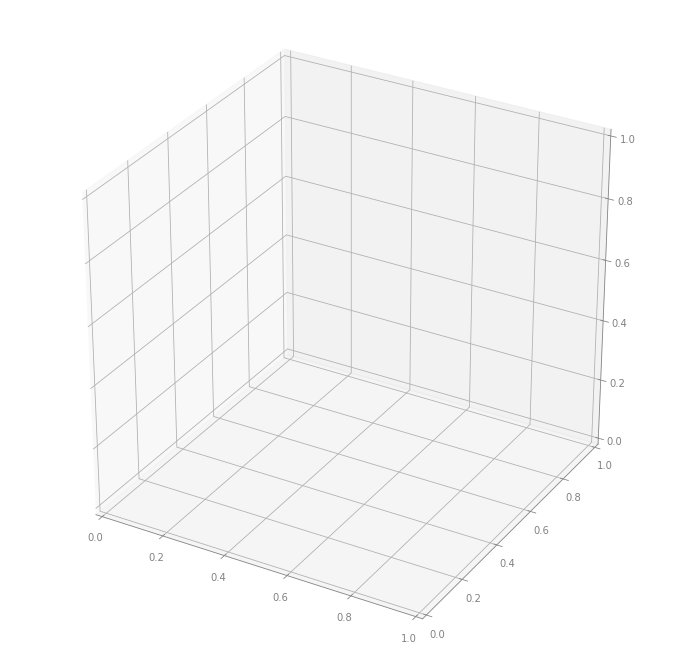

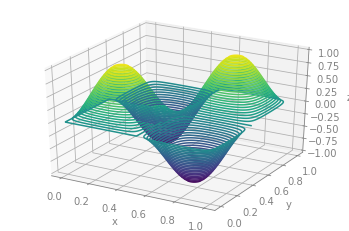

In [4]:
def plot_expr(expr, x, y, rango=(0, 1), ax=None, linestyle="solid"):
    """Gráfica expresiones de SymPy que dependen de una variable"""
    expr_num = lambdify([x,y], expr, "numpy")
    x_num = np.linspace(0, 1, 301)
    y_num = np.linspace(0, 1, 301)
    X, Y = np.meshgrid(x_num, y_num)
    b=expr_num(X,Y)
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    print(Y.shape)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, b, 50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
plot_expr(ue,x,y)

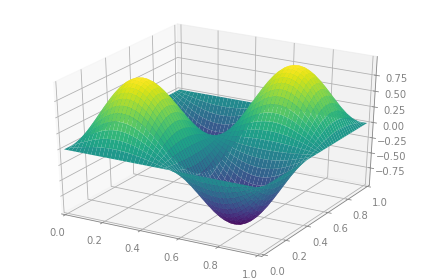

In [ ]:
plotting.plot3d(ue, (x,0,1),(y,0,1))

In [ ]:
#Se definen funciones que se utilizan a lo largo del punto:
def funcion_basex(x,k):
    """Elemento k de la base"""
    return (x*(1 - x)*x**k)

def funcion_basey(y,p):
    """Elemento k de la base"""
    return y*(1 - y)*y**p

def funcion_aproxi(x,y,num):   
    c = symbols('c0:%d'%num**2)
    u_n = sum([c[num*p+k]*funcion_basex(x,k)*funcion_basey(y,p)for k in range(num)for p in range(num)])
    u_m = [funcion_basex(x,k)*funcion_basey(y,p)for k in range(num)for p in range(num)]
    return  u_n, c, u_m
    
def residual(u, x, y):
    """Residual para el problema de interés"""
    return diff(u,x,2) + diff(u,y,2) + 8*pi**2*sin(2*pi*x)*sin(2*pi*y)

Utilizando una función con 2 términos de aproximación se tiene:

In [ ]:
nterms = 2
u, c, m = funcion_aproxi(x,y, nterms)

y un residual:

In [ ]:
r = expand(residual(u, x, y))
factor(r)

## a) Método de Galerkin

El método de Galerkin se impone que el residual sea ortogonal a cada uno
de los elementos de la base, es decir

$$\int\limits_0^1\int\limits_0^1 R \phi_k\, \mathrm{d}x dy=0\quad \forall \phi_k\, .$$

En este caso se tienen las ecuaciones:

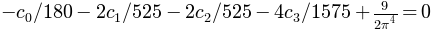

In [ ]:
#Ecuaciones de Galerkin:
eqs_gale = []
for cont in range(nterms**2):
    eqs_gale.append(Eq(integrate(r*m[cont], (x, 0, 1),(y,0,1)), 0))
    display(eqs_gale[cont])

Y ahora resolvemos las ecuaciones:

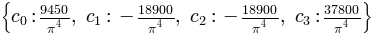

In [ ]:
#Se revuelven las ecuaciones
sol_gale = solve(eqs_gale, c)
sol_gale


Se obtiene la solución aproximada:





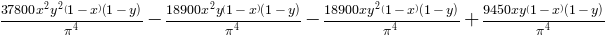

In [ ]:
u.subs(sol_gale)

Se comparan las soluciones:

In [ ]:
plotting.plot3d(u.subs(sol_gale), (x,0,1),(y,0,1))

<IPython.core.display.Javascript object>

## b) Mínimos cuadrados

En el método de mínimos cuadrados se minimiza el cuadrado de la norma del residual,es decir

$$\frac{\partial}{\partial c_i} \int\limits_0^1 R^2\, \mathrm{d}x = 0\quad \forall i\, .$$

Esta ecuación puede rescribirse como un residuo ponderado si se toma
la derivada parcial respecto al coeficiente i-ésimo como función de ponderación:

$$ \int\limits_0^1 R \frac{\partial R}{\partial c_i}\, \mathrm{d}x = 0\quad \forall i\, .$$

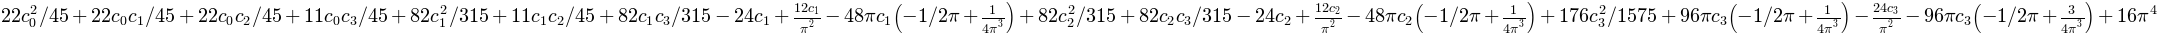

In [ ]:
#Se resuelve la integral
inte = integrate(expand(r**2), (x, 0, 1),(y,0,1))
inte

Y en este caso las ecuaciones serían

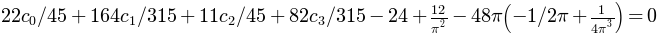

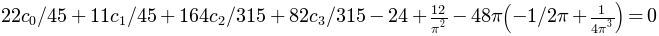

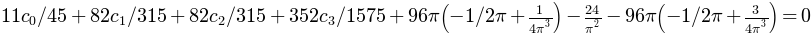

In [ ]:
#Ecuaciones minimos cuadrados:
eqs_min = []
for cont in range(nterms**2):
    eqs_min.append(Eq(diff(inte, c[cont]), 0))
    display(eqs_min[cont])

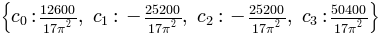

In [ ]:
#Se resuelven las ecuaciones
sol_min = solve(eqs_min, c)
sol_min

Se comparan las soluciones:

In [ ]:

u.subs(sol_min)
plotting.plot3d(u.subs(sol_min), (x,0,1),(y,0,1))

<IPython.core.display.Javascript object>

## c) Colocación

En el método de colocación se tiene que el residual debe ser cero en un conjunto de puntos.
Este método se puede reescribir como un método de residuos ponderados si se elige el delta de Dirac
como función de ponderación, es decir

$$\int\limits_0^1 R \delta(x - x_i)\, \mathrm{d}x = 0\quad \forall x_i\, ,$$

escrito de otra forma:

$$R (x_i) = 0\quad \forall x_i\, .$$

In [ ]:
x_colo = [(cont + 1)*S(1)/(nterms + 6) for cont in range(nterms+4)]
y_colo = [(cont + 2)*S(1)/(nterms + 6) for cont in range(nterms+4)]
x_colo.append(0.8)
y_colo.append(0.2)
x_colo.append(0.2)
y_colo.append(0.8)
x_colo.append(0.8)
y_colo.append(0.8)
y_colo.append(0.2)
x_colo.append(0.2)
x_colo, y_colo

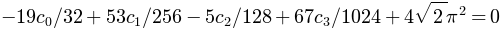

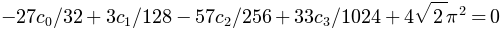

In [ ]:
#Ecuaciones método de colocación
eqs_colo = []
for cont in range(nterms**2):
    eqs_colo.append(Eq(r.subs([(x, x_colo[cont]), (y, y_colo[cont])]), 0))
    display(eqs_colo[cont])


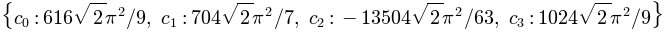

In [ ]:
#Solución ecuaciones
sol_col = solve(eqs_colo, c)
sol_col

Se comparan las soluciones:

In [ ]:

sol_col = solve(eqs_colo, c)
sol_col
plotting.plot3d(u.subs(sol_col), (x,0,1),(y,0,1))

<IPython.core.display.Javascript object>

#### Error


In [ ]:
#Se define el error residual de cada método:
res1 = expand((ue-u.subs(sol_gale))**2)
res2 = expand((ue-u.subs(sol_min))**2)
res3 = expand((ue-u.subs(sol_col))**2)

In [ ]:
err_gal = integrate(res1,(x,0,1),(y,0,1))/(integrate(ue**2,(x,0,1),(y,0,1)))
err_min = integrate(res2,(x,0,1),(y,0,1))/(integrate(ue**2,(x,0,1),(y,0,1)))
err_col = integrate(res3,(x,0,1),(y,0,1))/(integrate(ue**2,(x,0,1),(y,0,1)))

In [ ]:
#Se muestra el error residual obtenido en cada método:
display(N(err_gal),N(err_min),N(err_col))